# Introduction to machine learning assignment

In [12]:
#These two bits of code take very long to run, so running them is optional

run_rf=True #Random Forest to classify authors for the reuters corpus
run_nn=True  # Convolutional Neural Nets for image classification

## 1. Probability practice

### Part A

A= Occurance of a random clicker
<br>
B= Occurance of a truthful clicker
<br>
P(A)=0.3
<br>
P(B)=0.7
<br>
P(Yes)=0.65
<br>
P(No)=0.35
<br>
To find out- P(Yes/B)
<br>
P(Yes)=P(Yes/B)*P(B)+P(Yes/A)*P(A)
<br>
0.65=P(Yes/B)*0.7+0.5*0.3
<br>
P(Yes/B)=(0.65-0.5*0.3)/0.7 =  0.7142857142857143
<br>

So, the fraction of people who are Truthful Clickers (TC) and answered "Yes" is approximately **0.71428571** or **5/7**


### Part B

Probability of positive given disease - P(+/D)=0.993
<br>
Probability of negative given healthy - P(-/H)=0.9999
<br>
Disease incidence rate - P(D)=0.000025
<br>
To find out - Probability of disease given a positive test P(D/+)
<br>
We first need to calculate P(+) = P(+/D)*P(D)+P(+/H)*P(H)) = 0.993*0.000025+(1-0.9999)*(1-0.000025) =  0.000124822499999989
<br>
P(D/+)=P(+/D)*P(D)/P(+) = 0.993*0.000025/0.9931 =  0.19888241302651516
<br>

So, the probability that someone has the disease given that they tested positive is approximately **0.1988** or **19.88%**

## 2. Billboard

In [13]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
np.random.seed(42)
billboard=pd.read_csv("billboard.csv",index_col=False)
billboard.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


### Part A

In [14]:
result = billboard[["performer", "song", "year"]].groupby(["performer", "song"]) \
    .count().reset_index().sort_values("year", ascending=False).reset_index(drop=True) \
    .rename(columns={"year": "Number of Weeks in Billboard"}).head(10)

print(tabulate(result, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------------------------+-------------------------------------+------------------------------+
|                 performer                 |                song                 | Number of Weeks in Billboard |
+-------------------------------------------+-------------------------------------+------------------------------+
|              Imagine Dragons              |             Radioactive             |              87              |
|                AWOLNATION                 |                Sail                 |              79              |
|                The Weeknd                 |           Blinding Lights           |              76              |
|                Jason Mraz                 |              I'm Yours              |              76              |
|                LeAnn Rimes                |            How Do I Live            |              69              |
|                OneRepublic                |           Counting Stars          

Radioactive, Sail, and Blinding Lights occupied the top 3 spots with 87,79, and 76 weeks in the billboard top 100 respectively

## Part B

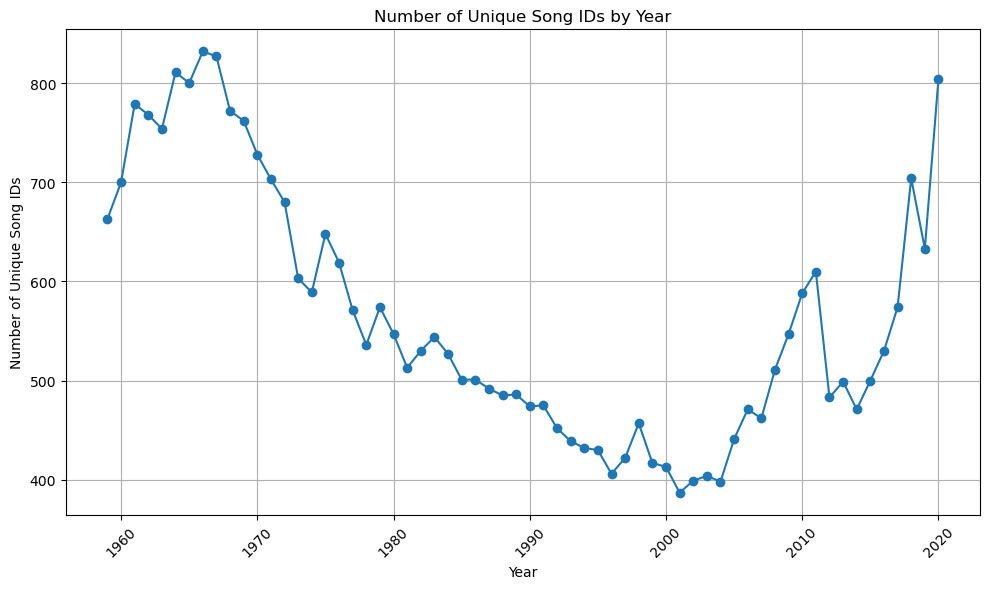

In [15]:
billboard_copy=billboard[~billboard["year"].isin([1958,2021])].copy(deep=True)
billboard_copy.loc["song_id"] = billboard_copy["song"] + billboard_copy["performer"]
result_df = billboard_copy[["song_id", "year"]].groupby("year").nunique()
result_df.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(result_df["year"], result_df["song_id"], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Unique Song IDs")
plt.title("Number of Unique Song IDs by Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that the musical diversity is slowly trending downwards from the mid 1960s all the way until the early 2000s, after that it 
has been mostly trending upwards till the current date with temporary downtrends in 2011 and 2018

## Part C

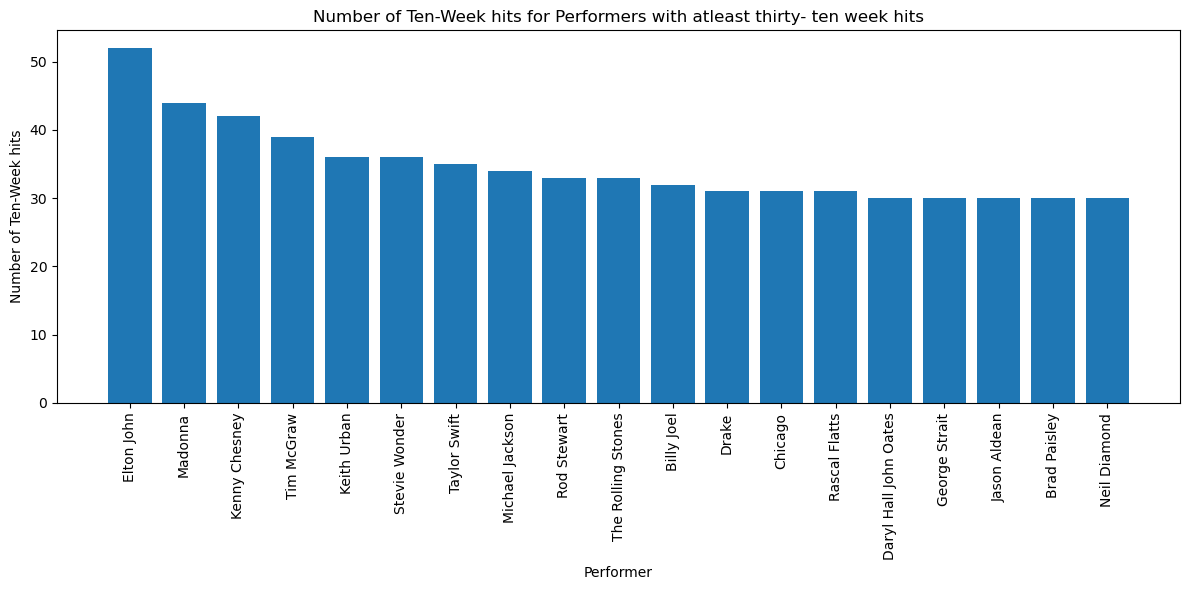

In [16]:
Song10=billboard[["performer", "song", "week"]].groupby(["performer", "song"]).count().reset_index()
Song10=Song10[Song10["week"]>=10]
Artist19=Song10[["performer","week"]].groupby("performer").count()
Artist19=Artist19[Artist19["week"]>=30]
Artist19.sort_values("week",ascending=False,inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(Artist19.index, Artist19["week"])
plt.xlabel("Performer")
plt.ylabel("Number of Ten-Week hits")
plt.title("Number of Ten-Week hits for Performers with atleast thirty- ten week hits")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This plot shows the number of Ten-Week hits for artists having atleast 30 of the same, This plot shows a lot of well-known artists which makes sense as artists dominating the billboard are bound to be very famous. Elton John, Madonna, and Kenny Chesney occupy the top 3 spots

## 3. Visual story telling part 1: green buildings

In [17]:
green=pd.read_csv("greenbuildings.csv")
green.head(5)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


### Reproducing the staff member's analysis 

In [18]:
green_cleaned=green[green["leasing_rate"]>=10].copy(deep=True)

In [19]:
print(green_cleaned[["green_rating","Rent"]].groupby("green_rating").median())

               Rent
green_rating       
0             25.03
1             27.60


We can confirm the median values reported by the staff member is correct. The idea to remove outliers in terms of imposing a minimum leasing_rate is good, so we will continue to utilize this treated data for our analysis.


However the staff member has not controlled for any possible confounding variables. Let us explore and try to see if there are indeed any confounding variables.


The rest of the calculations are correct, but the 2.6 extra dollars per square foot per year conclusion may not be entirely correct.


Let us make a shortlist for possible confounders- (variables that could also conceivably cause a building to attract a higher rent per square foot per year).


Size could be one possible such variable, however the rent is measured per square feet so maybe not.

The same goes with number of stories, even though the rent is measured per unit area, a taller rise building may attract higher rents per unit area.

Age could be a good contender for a confounder, older buildings may not attract as high of rents, and they are also less likely to be equipped with the latest green technologies to receive a green rating.

Class A and Class B classifications could also be a confounder, Class A buildings are more likely to have green classifications because they might have higher budgets in general to try and achieve green ratings.

Green buildings may also have more amenities which can attract higher rent.

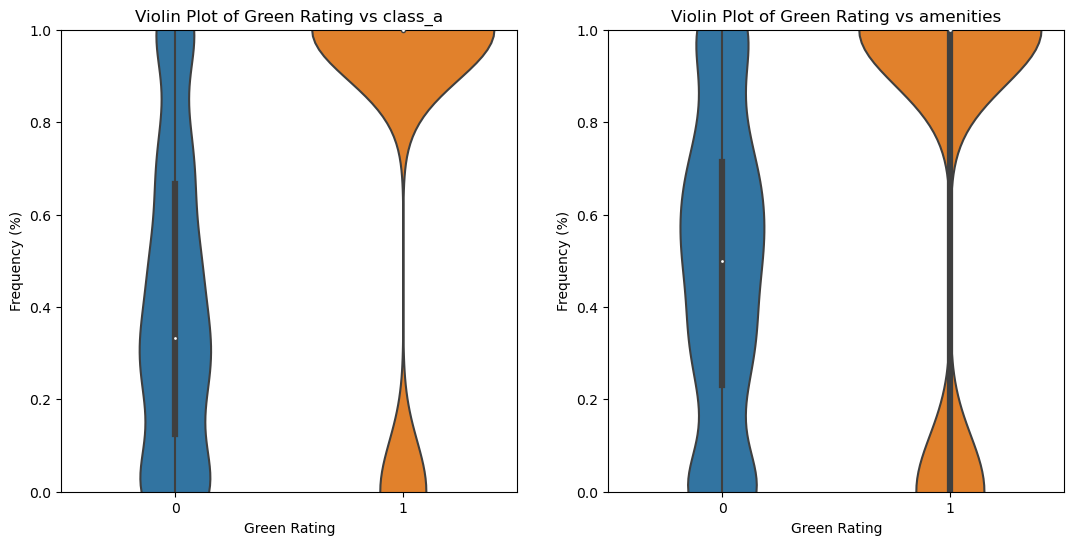

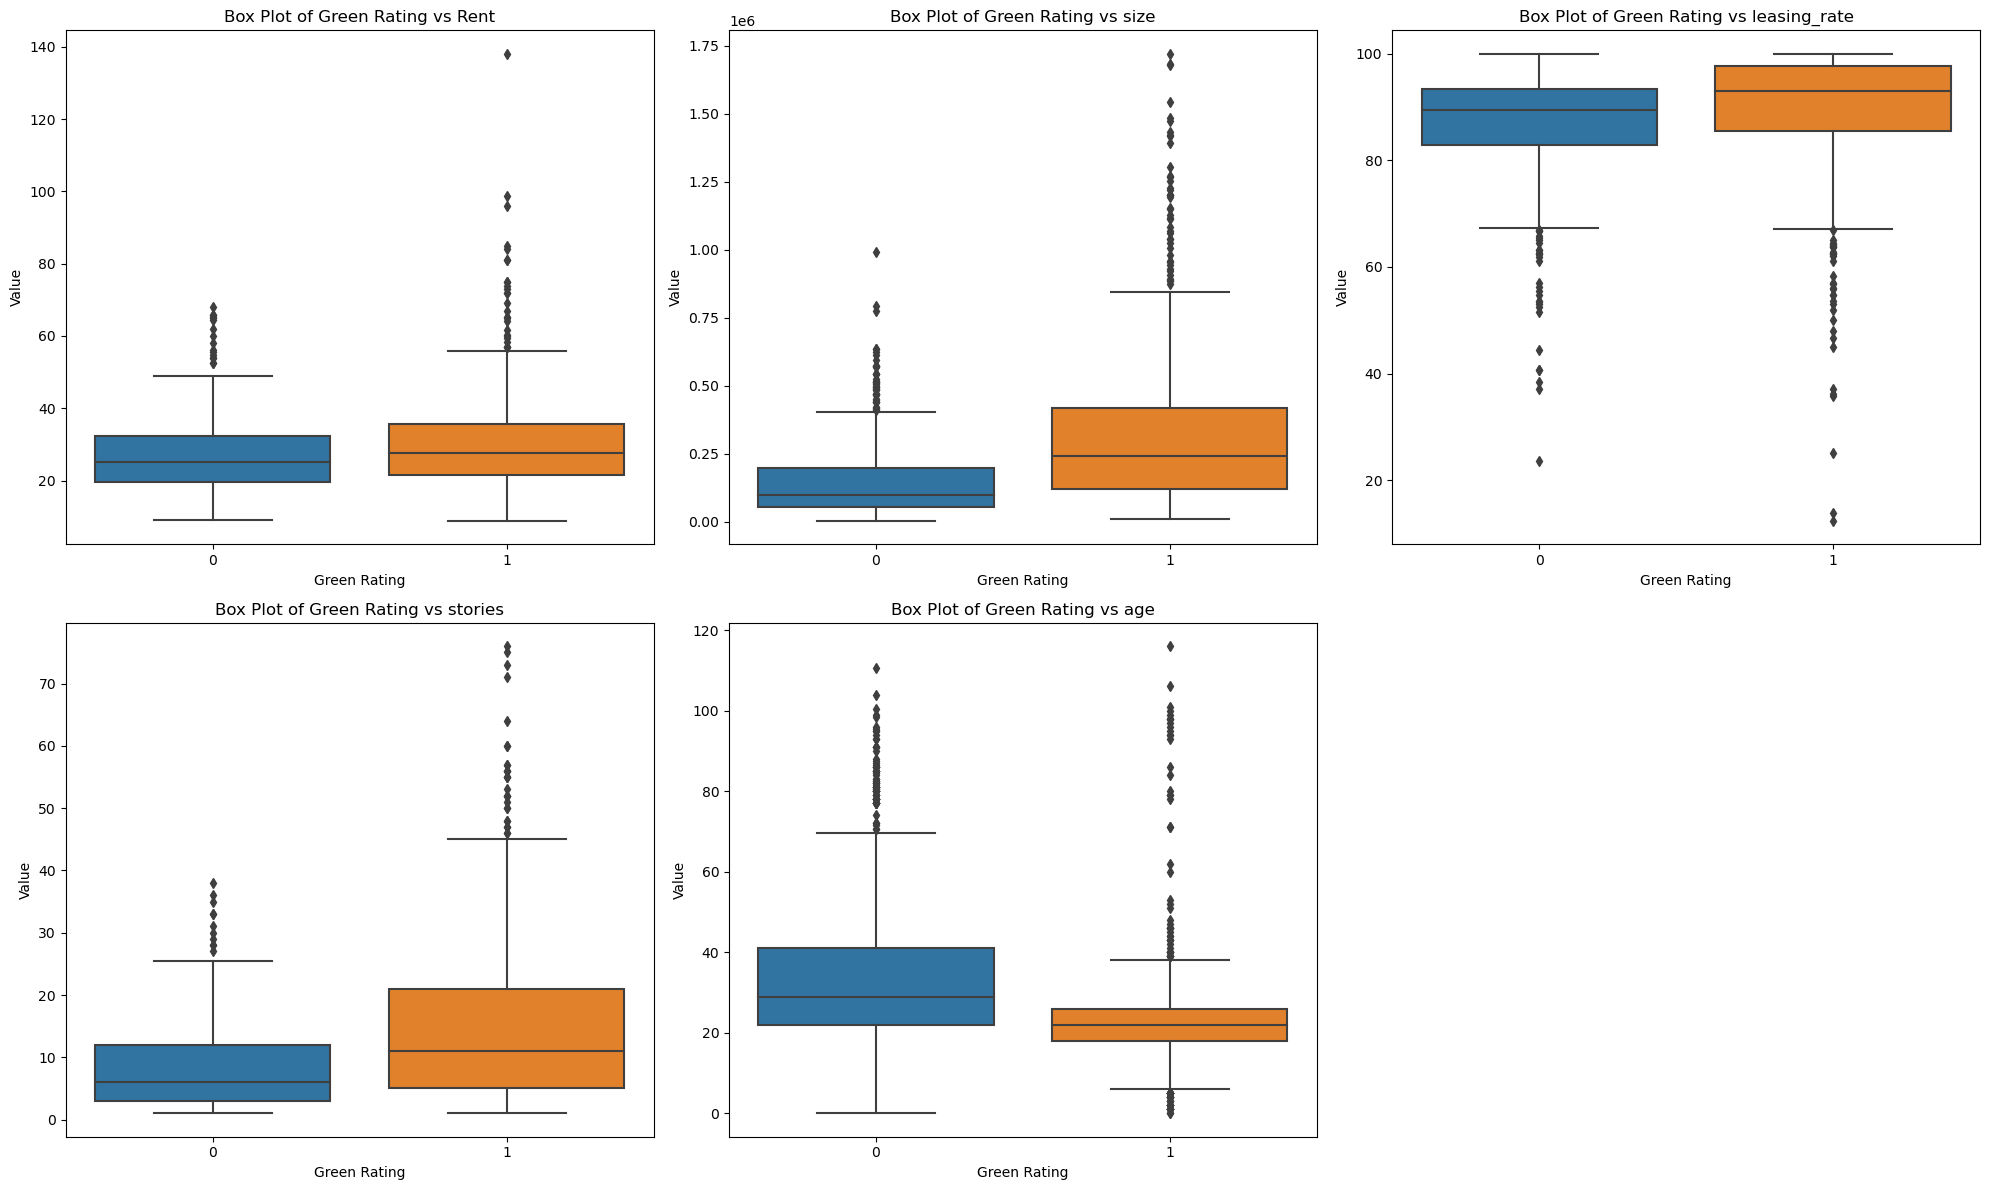

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns=['Rent','size','leasing_rate','stories','age']
binary_columns=['class_a','amenities']

aggregation = {}
for col in numeric_columns:
    aggregation[col] = 'median'
for col in binary_columns:
    aggregation[col] = lambda x: sum(x) / len(x)  # Calculate percentage frequency

# Grouping, aggregating, and resetting index
green_cleaned_grouped = green_cleaned.groupby(["cluster", "green_rating"]).agg(aggregation).reset_index()

plots_per_row = 3

# Calculate the number of rows required for binary and numeric columns separately
num_rows_binary = (len(binary_columns) + plots_per_row - 1) // plots_per_row
num_rows_numeric = (len(numeric_columns) + plots_per_row - 1) // plots_per_row

# Create subplots for binary columns
fig, axes = plt.subplots(num_rows_binary, plots_per_row, figsize=(20, num_rows_binary * 6), sharey=False)

# Loop through the binary columns and create violin plots
for i, col in enumerate(binary_columns):
    row = i // plots_per_row
    col_idx = i % plots_per_row
    ax = axes[row, col_idx] if num_rows_binary > 1 else axes[col_idx]
    sns.violinplot(data=green_cleaned_grouped, x="green_rating", y=col, ax=ax)
    ax.set_xlabel("Green Rating")
    ax.set_ylabel("Frequency (%)")
    ax.set_title(f"Violin Plot of Green Rating vs {col}")
    ax.set_ylim(0, 1)

# Remove any empty subplots for binary columns
for i in range(len(binary_columns), num_rows_binary * plots_per_row):
    fig.delaxes(axes.flatten()[i])

# Create subplots for numeric columns starting on a new row
fig, axes = plt.subplots(num_rows_numeric, plots_per_row, figsize=(20, num_rows_numeric * 6), sharey=False)

# Loop through the numeric columns and create box plots
for i, col in enumerate(numeric_columns):
    row = i // plots_per_row  # Calculate row index
    col_idx = i % plots_per_row  # Calculate column index
    ax = axes[row, col_idx] if num_rows_numeric > 1 else axes[col_idx]
    sns.boxplot(data=green_cleaned_grouped, x="green_rating", y=col, ax=ax)
    ax.set_xlabel("Green Rating")
    ax.set_ylabel("Value")
    ax.set_title(f"Box Plot of Green Rating vs {col}")

# Remove any empty subplots for numeric columns
for i in range(len(numeric_columns), num_rows_numeric * plots_per_row):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


In order to test our hypothesis, we take the median value of the metrics within every cluster and Green rating


We then plot the distribution of the cluster medians

Observations are as follows - 
1) The distribution of rent medians is indeed higher for the green rated homes
2) Green Rating homes are more likely to be class A homes, and therefore might attract higher rent
3) Green Rating homes are more likely to have amenities, and therefore might attract higher rent
4) Green Rating homes are more likely to have a higher leasing rate, and therefore has a higher square footage to attract rent
5) Green Rating homes are more likely to be newer buildings, and therefore might attract higher rent
6) Green Rating homes are more likely to have more stories and size, this may or may not affect the rent per square footage

Hence, if we are to perform a proper anaylsis, we must control for these confounding variables and make sure they do not vary so much intra cluster.

If there is a single confounding variable, stratification can help, but with more confounding variables, this becomes more complex and regression analysis is preferred to study correlations.

## 4. Visual story telling part 2: Capital Metro data

In [21]:
capmetro=pd.read_csv("capmetro_UT.csv", parse_dates=['timestamp'])
capmetro.head(5)

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


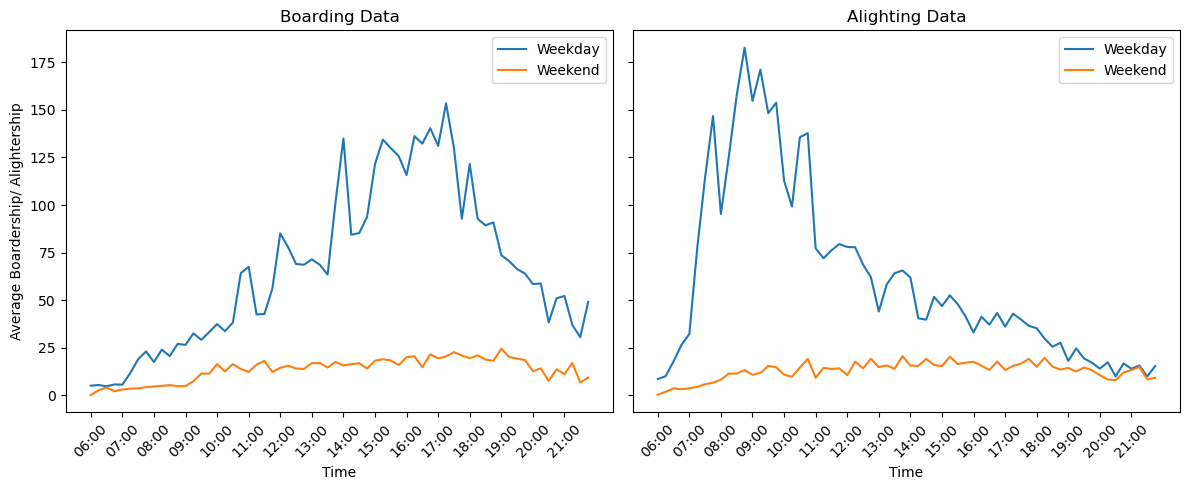

In [22]:
def extract_day_time(dt):
    return dt.time(), dt.date()

capmetro['time'], capmetro['date'] = zip(*capmetro['timestamp'].apply(extract_day_time))

grouped_data=capmetro[["weekend","time","boarding","alighting"]].groupby(["weekend","time"]).mean()

weekday_data = grouped_data[grouped_data.index.get_level_values('weekend') == 'weekday']
weekend_data = grouped_data[grouped_data.index.get_level_values('weekend') == 'weekend']

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

# Plot boarding data for weekday and weekend on the first subplot
weekday_data['boarding'].plot(ax=ax1, label='Weekday')
weekend_data['boarding'].plot(ax=ax1, label='Weekend')
ax1.set_ylabel('Average Boardership/ Alightership')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_title('Boarding Data')

# Plot alighting data for weekday and weekend on the second subplot
weekday_data['alighting'].plot(ax=ax2, label='Weekday')
weekend_data['alighting'].plot(ax=ax2, label='Weekend')
ax2.set_ylabel('Average Alightership')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_title('Alighting Data')

# Get the unique time values
unique_times = weekday_data.index.get_level_values('time').unique()

# Filter and set x-axis tick labels for intervals of 3 hours
x_ticks = [time for i, time in enumerate(unique_times) if i % 4 == 0]
ax1.set_xticks(range(0, len(x_ticks) * 4, 4))
ax1.set_xticklabels([time.strftime('%H:%M') for time in x_ticks], rotation=45)  # Rotate tick labels

ax2.set_xticks(range(0, len(x_ticks) * 4, 4))
ax2.set_xticklabels([time.strftime('%H:%M') for time in x_ticks], rotation=45)  # Rotate tick labels

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

This plot shows the difference in average number of people boarding and alighting a bus near around UT campus, broken down by Weekday and Weekend
A few observations are,
1) During weekdays, the number of people alighting is higher towards the start of the day, this makes sense as many people are utilizing the capmetro service to reach UT for their morning classes, similarly, the number of people boarding gets higher around early evening when many students are done with classes.
2) During weekdays, there is not much of a trend as there are no classes and no specific reason for people to prefer travelling at one time over another.

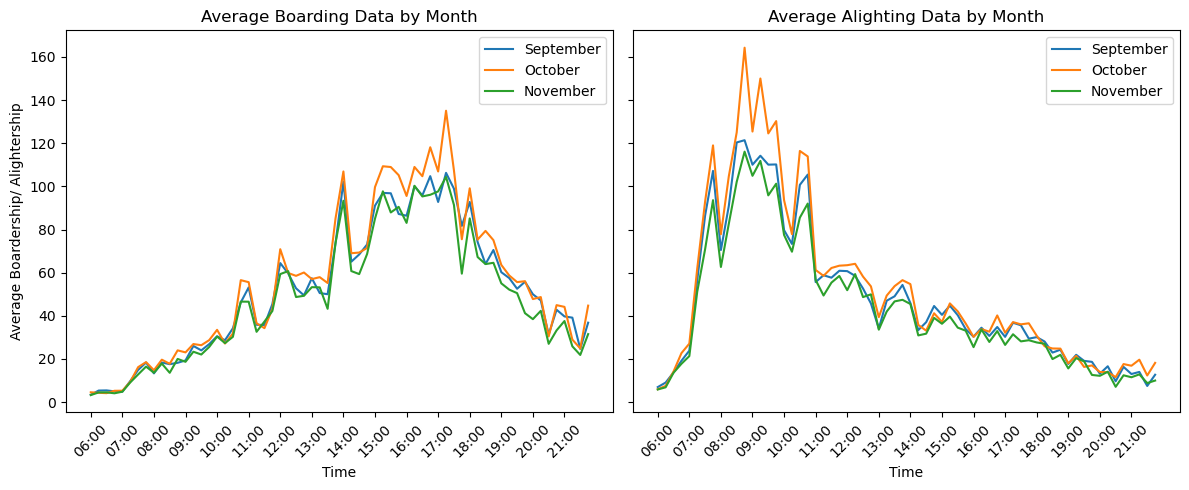

In [23]:
def extract_month(dt):
    return dt.strftime('%B') 

# Apply the custom function to the 'timestamp' column and create a new column 'month'
capmetro['month'] = capmetro['timestamp'].apply(extract_month)

grouped_data = capmetro[["month", "time", "boarding", "alighting"]].groupby(["month", "time"]).mean()
unique_times = grouped_data.index.get_level_values('time').unique()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for month in range(9, 12):  # Assuming data spans 4 months
    month_name = capmetro[capmetro['month'] == extract_month(pd.Timestamp(year=2023, month=month, day=1))]['month'].iloc[0]
    month_data = grouped_data[grouped_data.index.get_level_values('month') == month_name]
    month_data['boarding'].plot(ax=ax1, label=f'{month_name}')

for month in range(9, 12):  # Assuming data spans 4 months
    month_name = capmetro[capmetro['month'] == extract_month(pd.Timestamp(year=2023, month=month, day=1))]['month'].iloc[0]
    month_data = grouped_data[grouped_data.index.get_level_values('month') == month_name]
    month_data['alighting'].plot(ax=ax2, label=f'{month_name}')

ax1.set_ylabel('Average Boardership/ Alightership')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_title('Average Boarding Data by Month')

ax2.set_ylabel('Alighting')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_title('Average Alighting Data by Month')

x_ticks = [time for i, time in enumerate(unique_times) if i % 4 == 0]
ax1.set_xticks(range(0, len(x_ticks) * 4, 4))
ax1.set_xticklabels([time.strftime('%H:%M') for time in x_ticks], rotation=45)

ax2.set_xticks(range(0, len(x_ticks) * 4, 4))
ax2.set_xticklabels([time.strftime('%H:%M') for time in x_ticks], rotation=45)

plt.tight_layout()
plt.show()

This plot shows that October has a higher utilization of capmetro services compared to September and November, but there isn't much of a difference in the trend.

This could be because there are more important classes that students cannot afford to miss in October, but we cannot know why for sure from this data.

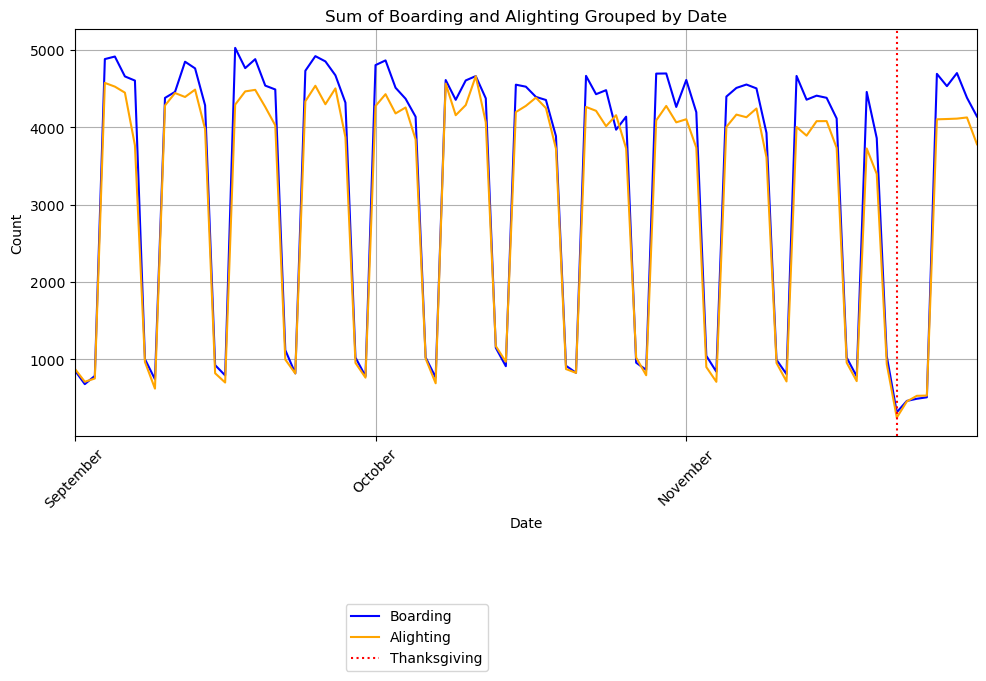

In [24]:
capmetro['date'] = pd.to_datetime(capmetro['date'])

# Group by date and calculate the sum of boarding and alighting
grouped = capmetro.groupby(capmetro['date'].dt.date).sum(numeric_only=True)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(grouped.index, grouped['boarding'], label='Boarding', color='blue')
plt.plot(grouped.index, grouped['alighting'], label='Alighting', color='orange')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sum of Boarding and Alighting Grouped by Date')
plt.axvline(pd.to_datetime('2018-11-22'), color='Red', linestyle='dotted', label='Thanksgiving')
plt.legend(loc='best', bbox_to_anchor=(0.5, -0.005), bbox_transform=plt.gcf().transFigure)
plt.grid(True)

# Format x-axis ticks to display month names
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(grouped.index.min(), grouped.index.max()) 

plt.show()

The above graph shows the daily sum of ridership and alightership of capmetro services near UT. A dip can be observed around thanksgiving.

We think the temperature does not affect the usership of capmetro services, i.e  if people have to get somewhere they will still go there regardless of the temperature for the most part. Even if the temperature shows an effect on ridership, it more than likely is because temperature varies with time of day and so does the ridership.

## 5. Wine Clustering

In [40]:
wine=pd.read_csv("wine.csv")
wine_x = wine.drop(['quality', 'color'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_x = scaler.fit_transform(wine_x)

wine.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


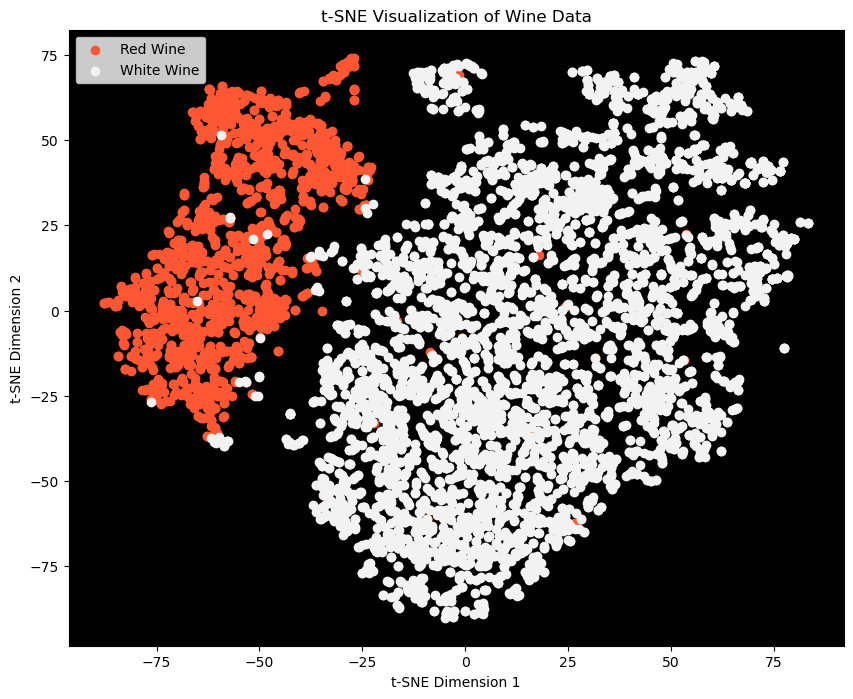


We can see that when we use tSNE for dimension reduction to 2 components, it is separating the red and white wines well, below are the loadings that make up the 2 tSNE components

t-SNE Loadings 1:
fixed.acidity - -76.95189666748047
volatile.acidity - -74.99669647216797
citric.acid - -74.38449096679688
residual.sugar - -59.40236282348633
chlorides - -76.95176696777344
free.sulfur.dioxide - -76.9159927368164
total.sulfur.dioxide - -68.89388275146484
density - -70.069091796875
pH - -70.73545837402344
sulphates - -25.625669479370117
alcohol - -64.26252746582031

t-SNE Loadings 2:
fixed.acidity - -2.807837724685669
volatile.acidity - 9.224432945251465
citric.acid - 9.413971900939941
residual.sugar - 49.5587043762207
chlorides - -2.806929588317871
free.sulfur.dioxide - -3.144716262817383
total.sulfur.dioxide - -1.977472186088562
density - -5.421543598175049
pH - 0.3024073541164398
sulphates - 29.913408279418945
alcohol - -0.47424426674842834



In [42]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
wine_tsne = tsne.fit_transform(wine_x)

# Create a new DataFrame with the t-SNE results
wine_tsne_df = pd.DataFrame(wine_tsne, columns=['TSNE1', 'TSNE2'])

# Combine the t-SNE results with the color information
wine_tsne_df['color'] = wine['color']

# Set up the plot with a black background
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('black')

# Define colors for red and white wines
red_color = '#FF5733'  # A shade of red
white_color = '#F2F2F2'  # A shade of light gray

# Plot the t-SNE results with different colors for each wine color
for color_value in wine['color'].unique():
    color_data = wine_tsne_df[wine_tsne_df['color'] == color_value]
    
    # Set color based on wine color
    if color_value == 'red':
        plt.scatter(color_data['TSNE1'], color_data['TSNE2'], color=red_color, label='Red Wine')
    else:
        plt.scatter(color_data['TSNE1'], color_data['TSNE2'], color=white_color, label='White Wine')

plt.title('t-SNE Visualization of Wine Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Display linear compositions
print("\nWe can see that when we use tSNE for dimension reduction to 2 components, it is separating the red and white wines well, below are the loadings that make up the 2 tSNE components\n")

# Get the linear compositions (components) of t-SNE
tsne_components = tsne.embedding_

# Display the linear compositions with feature names
feature_names =  wine.drop(['quality', 'color'], axis=1).columns  # Assuming wine_x is a DataFrame
for i, component in enumerate(tsne_components.T, start=1):
    print(f"t-SNE Loadings {i}:")
    for feature_name, weight in zip(feature_names, component):
        print(f"{feature_name} - {weight}")
    print()

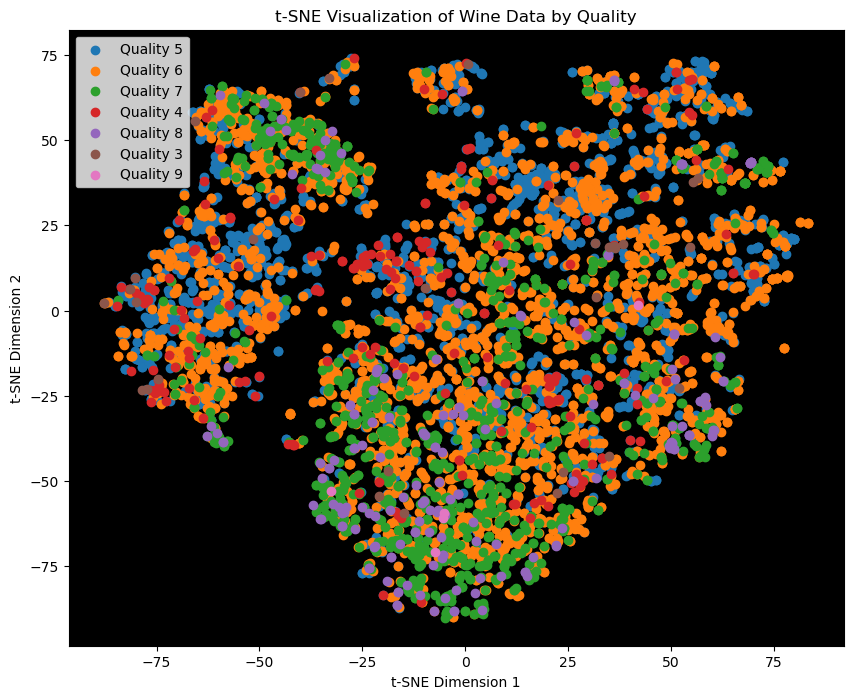

In [27]:
# Set up the plot with a black background
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('black')

# Get unique quality values and define distinct colors
unique_qualities = wine['quality'].unique()
distinct_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the t-SNE results with distinct colors for each quality value
for i, quality_value in enumerate(unique_qualities):
    quality_data = wine_tsne_df[wine['quality'] == quality_value]  # Use wine_tsne_df here
    
    plt.scatter(
        quality_data['TSNE1'], quality_data['TSNE2'],
        color=distinct_colors[i], label=f'Quality {quality_value}'
    )

plt.title('t-SNE Visualization of Wine Data by Quality')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


We can see that our tSNE with 2 components is not satisfactorily capturing the different qualities of wine into distinct clusters

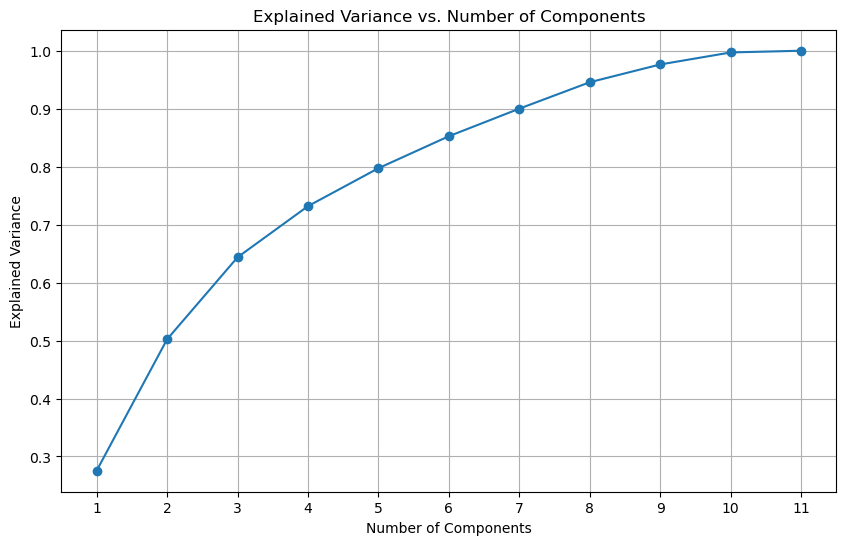

Here, we can see that 7 principal components capture 90% of the variance. Hence, we can proceed with 7 components.



In [45]:
from sklearn.decomposition import PCA
import numpy as np

# Define the range of n_components to try
n_components_range = np.arange(1, wine_x.shape[1]+1)

# Initialize an empty list to store explained variances
explained_variances = []

# Loop over different values of n_components
for n_components in n_components_range:
    # Initialize the PCA model
    pca = PCA(n_components=n_components, random_state=42)
    
    # Fit PCA and transform the data
    wine_pca = pca.fit_transform(wine_x)
    
    # Calculate the explained variance for this number of components
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variances for different numbers of components
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variances, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(n_components_range)
plt.grid()
plt.show()

print("Here, we can see that 7 principal components capture 90% of the variance. Hence, we can proceed with 7 components.\n")

In [51]:
pca = PCA(n_components=7, random_state=42)
# Fit the PCA model and transform the data
wine_pca = pca.fit_transform(wine_x)
# Access the PCA components (loadings)
pca_components = pca.components_
# Display the loadings for each principal component
for i, component in enumerate(pca_components):
    print(f"Principal Component {i+1} Loadings:")
    # Sort the loadings in descending order
    sorted_loadings = sorted(zip(wine.drop(["quality","color"], axis=1).columns, component), key=lambda x: abs(x[1]), reverse=True)
    for feature_name, loading in sorted_loadings:
        print(f"{feature_name}: {loading:.4f}")
    print("\n")

Principal Component 1 Loadings:
total.sulfur.dioxide: 0.4874
free.sulfur.dioxide: 0.4309
volatile.acidity: -0.3808
residual.sugar: 0.3459
sulphates: -0.2941
chlorides: -0.2901
fixed.acidity: -0.2388
pH: -0.2187
citric.acid: 0.1524
alcohol: -0.1064
density: -0.0449


Principal Component 2 Loadings:
density: 0.5840
alcohol: -0.4651
fixed.acidity: 0.3364
residual.sugar: 0.3299
chlorides: 0.3153
sulphates: 0.1917
citric.acid: 0.1833
pH: -0.1559
volatile.acidity: 0.1175
total.sulfur.dioxide: 0.0873
free.sulfur.dioxide: 0.0719


Principal Component 3 Loadings:
citric.acid: 0.5906
pH: -0.4553
fixed.acidity: 0.4343
volatile.acidity: -0.3073
alcohol: 0.2611
density: -0.1756
residual.sugar: -0.1647
free.sulfur.dioxide: -0.1342
total.sulfur.dioxide: -0.1075
sulphates: 0.0700
chlorides: -0.0167


Principal Component 4 Loadings:
sulphates: 0.6405
pH: 0.4146
free.sulfur.dioxide: 0.3573
citric.acid: 0.2643
chlorides: 0.2447
volatile.acidity: -0.2128
total.sulfur.dioxide: 0.2084
residual.sugar: -0.167

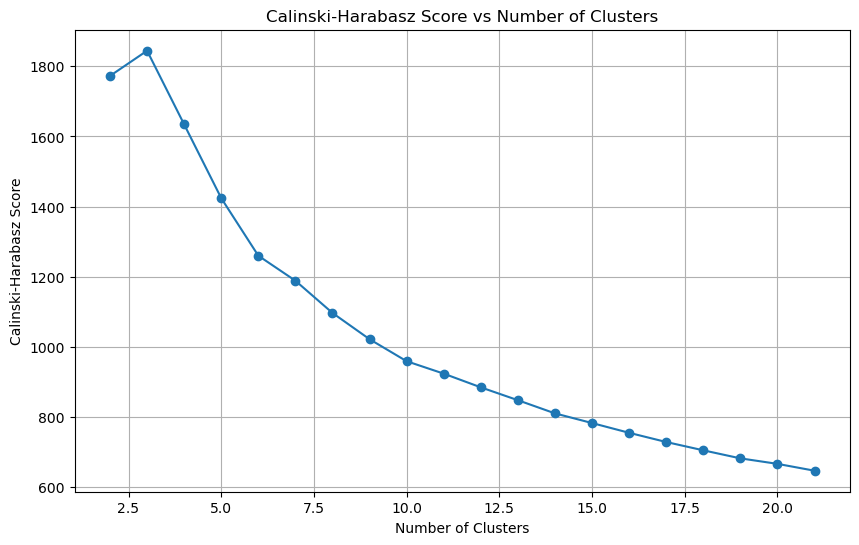

In [46]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
import pandas as pd

ch_score_df = pd.DataFrame(columns=["Number of clusters", "CH score"])

for i in range(2, 22):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42, init='k-means++')
    wine_cluster = kmeans.fit(wine_x)
    labels = wine_cluster.labels_
    ch_score = calinski_harabasz_score(wine_x, labels)
    
    iteration_df = pd.DataFrame({"Number of clusters": [i], "CH score": [ch_score]})
    ch_score_df = pd.concat([ch_score_df, iteration_df], ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(ch_score_df["Number of clusters"], ch_score_df["CH score"], marker='o')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

After K=2, the CH score drops down considerably, hence, let us select K=2

In [30]:
# Train a KMeans model with 2 clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42, init='k-means++')
kmeans.fit(wine_pca)

# Get cluster assignments for each row
cluster_assignments = kmeans.labels_

# Add cluster assignments to your DataFrame
wine['cluster_label'] = cluster_assignments

In [31]:
import pandas as pd

# Create a cross-tabulation between cluster labels and wine colors
cross_tab = pd.crosstab(wine['cluster_label'], wine['color'])

# Add column and row names for clarity
cross_tab.columns = ['Red Wine', 'White Wine']
cross_tab.index = [f'Cluster {label}' for label in cross_tab.index]

# Calculate the proportion of each wine color within each cluster
total_samples_per_cluster = cross_tab.sum(axis=1)
cross_tab_proportions = cross_tab.divide(total_samples_per_cluster, axis=0)

# Print the discriminatory effect of clusters on wine color
print("Discriminatory Effect of Clusters on Wine Color\n")
print(cross_tab_proportions)

# Find and display the maximum value and corresponding wine color for each cluster
max_values = cross_tab_proportions.max(axis=1)
corresponding_colors = cross_tab_proportions.idxmax(axis=1)
print("\nMaximum Value and Corresponding Color for Each Cluster\n")
for cluster_label, max_value, color in zip(max_values.index, max_values, corresponding_colors):
    print(f"Cluster {cluster_label}: Max Value = {max_value:.6f}, Corresponding Color = {color}")

Discriminatory Effect of Clusters on Wine Color

           Red Wine  White Wine
Cluster 0  0.955097    0.044903
Cluster 1  0.005156    0.994844

Maximum Value and Corresponding Color for Each Cluster

Cluster Cluster 0: Max Value = 0.955097, Corresponding Color = Red Wine
Cluster Cluster 1: Max Value = 0.994844, Corresponding Color = White Wine


We can see that cluster 0 corresponds to red wine and cluster 1 corresponds to white wine, hence, we can say that our cluster approach is capable of differentiating red from white wines very well.

In [32]:
import pandas as pd

# Create a cross-tabulation between cluster labels and quality levels
cross_tab_quality = pd.crosstab(wine['cluster_label'], wine['quality'])

# Add column and row names for clarity
quality_levels = sorted(wine['quality'].unique())
cross_tab_quality.columns = quality_levels
cross_tab_quality.index = [f'Cluster {label}' for label in cross_tab_quality.index]

# Calculate the proportion of each quality level within each cluster
total_samples_per_cluster_quality = cross_tab_quality.sum(axis=1)
cross_tab_proportions_quality = cross_tab_quality.divide(total_samples_per_cluster_quality, axis=0)

# Print the discriminatory effect of clusters on wine quality
print("Discriminatory Effect of Clusters on Wine Quality\n")
print(cross_tab_proportions_quality)

# Find and display the maximum value and corresponding quality level for each cluster
max_values_quality = cross_tab_proportions_quality.max(axis=1)
corresponding_qualities = cross_tab_proportions_quality.idxmax(axis=1)
print("\nMaximum Value and Corresponding Quality for Each Cluster (Wine Quality)\n")
for cluster_label, max_value, quality in zip(max_values_quality.index, max_values_quality, corresponding_qualities):
    print(f"Cluster {cluster_label}: Max Value = {max_value:.6f}, Corresponding Quality = {quality}")


Discriminatory Effect of Clusters on Wine Quality

                  3         4         5         6         7         8  \
Cluster 0  0.007282  0.046117  0.427184  0.388956  0.120146  0.010316   
Cluster 1  0.003712  0.028872  0.295731  0.452671  0.181687  0.036296   

                  9  
Cluster 0  0.000000  
Cluster 1  0.001031  

Maximum Value and Corresponding Quality for Each Cluster (Wine Quality)

Cluster Cluster 0: Max Value = 0.427184, Corresponding Quality = 5
Cluster Cluster 1: Max Value = 0.452671, Corresponding Quality = 6


We are unable to capture the wine quality attribute through our clustering approach.

## 6. Market segmentation

In [33]:
marketing=pd.read_csv("social_marketing.csv")
marketing.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
print(marketing.columns)
marketing.describe()

Index(['Unnamed: 0', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')


,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.398757,1.526262,1.585004,2.696777,0.812992,1.070287,1.594012,1.788632,1.397488,0.863867,...,1.095407,0.705151,0.921340,0.710860,0.767699,1.462065,0.996574,0.336336,0.006470,0.403324
std,3.529126,1.268890,2.285530,2.731510,0.935853,1.658783,2.160917,3.031113,1.775557,1.132562,...,1.914829,1.327903,1.515359,1.782347,1.188259,2.405244,1.828412,0.618147,0.083288,1.813428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,26.000000,8.000000,26.000000,21.000000,9.000000,17.000000,20.000000,37.000000,16.000000,10.000000,...,20.000000,14.000000,14.000000,24.000000,11.000000,19.000000,18.000000,6.000000,2.000000,26.000000


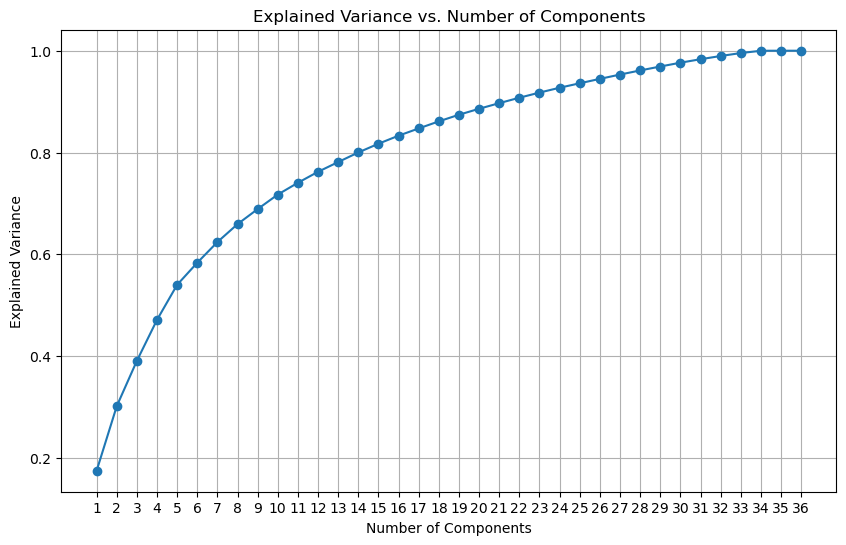

In [35]:
marketing_x=marketing.drop(['Unnamed: 0'], axis=1)

marketing_x = marketing_x.div(marketing_x.sum(axis=1), axis=0)

# Define the range of n_components to try
n_components_range = np.arange(1, marketing_x.shape[1]+1)

# Initialize an empty list to store explained variances
explained_variances = []

# Loop over different values of n_components
for n_components in n_components_range:
    # Initialize the PCA model
    pca = PCA(n_components=n_components, random_state=42)
    
    # Fit PCA and transform the data
    marketing_pca = pca.fit_transform(marketing_x)
    
    # Calculate the explained variance for this number of components
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variances for different numbers of components
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variances, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(n_components_range)
plt.grid()
plt.show()

#The loadings for the 14 components 
pca = PCA(n_components=14, random_state=42)

# Fit the PCA model and transform the data
marketing_pca = pca.fit_transform(marketing_x)


Here, we can see that 14 principal components captures 80% of the variance and the explained variance levels off after that
We will proceed with K-means clustering with our 14 principal components.

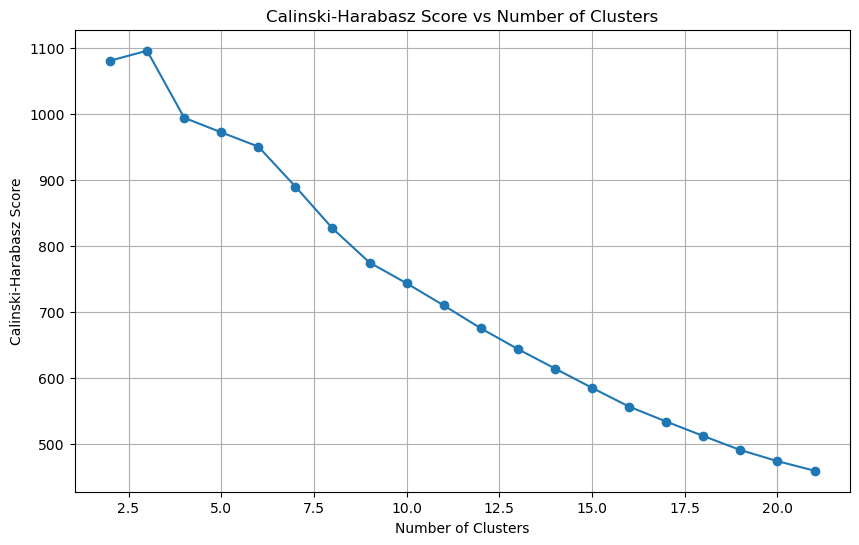

In [36]:
ch_score_df = pd.DataFrame(columns=["Number of clusters", "CH score"])

for i in range(2, 22):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42, init='k-means++')
    marketing_cluster = kmeans.fit(marketing_x)
    labels = marketing_cluster.labels_
    ch_score = calinski_harabasz_score(marketing_x, labels)
    
    iteration_df = pd.DataFrame({"Number of clusters": [i], "CH score": [ch_score]})
    ch_score_df = pd.concat([ch_score_df, iteration_df], ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(ch_score_df["Number of clusters"], ch_score_df["CH score"], marker='o')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

After observing the CH score vs Number of clusters plot, the observations are as detailed below
After K=6, the CH score drops down considerably, hence, we select K=6 (six clusters for our analysis)
We will now analyze these 6 clusters for their characteristics.

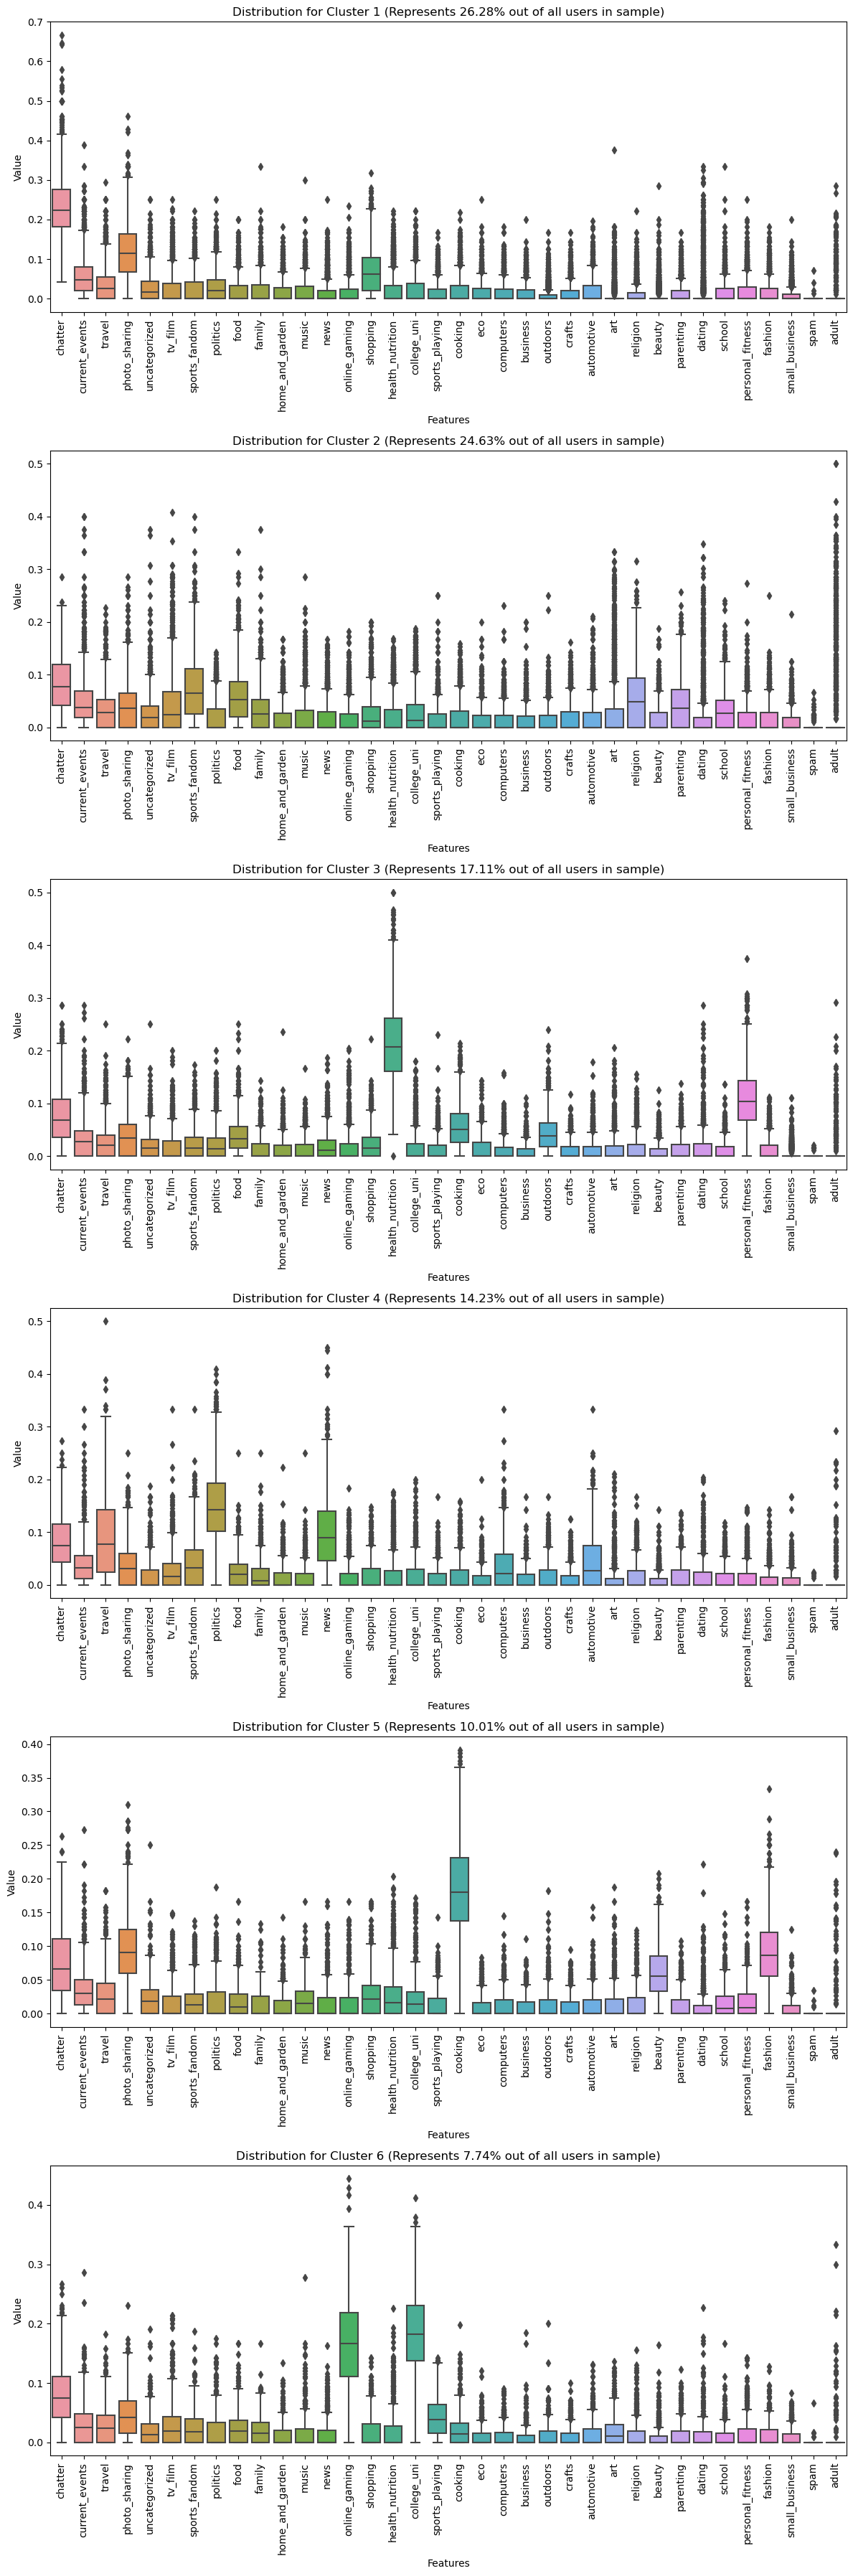

In [37]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42, init='k-means++')
marketing_cluster = kmeans.fit(marketing_x)
labels = marketing_cluster.labels_
marketing_x["cluster"] = labels

percentage_of_total = []
n_samples = len(marketing_x)
for cluster_num in range(len(set(labels))):
    percentage = len(marketing_x[marketing_x['cluster'] == cluster_num]) * 100 / n_samples
    percentage_of_total.append(percentage)

sorted_clusters = sorted(range(len(percentage_of_total)), key=lambda k: percentage_of_total[k], reverse=True)

n_clusters = len(sorted_clusters)
fig, axes = plt.subplots(nrows=n_clusters, ncols=1, figsize=(12, 6 * n_clusters))

for i, cluster_num in enumerate(sorted_clusters):
    ax = axes[i]
    sns.boxplot(data=marketing_x[marketing_x['cluster'] == cluster_num].drop(columns=['cluster']), ax=ax)
    ax.set_title(f'Distribution for Cluster {i + 1} (Represents {percentage_of_total[cluster_num]:.2f}% out of all users in sample)')
    ax.set_ylabel('Value')
    ax.set_xlabel('Features')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

plt.tight_layout()
plt.show()


Takeaways about each cluster:
<br>
Cluster 1 - This cluster contains users who primarily liked to share photos and were interested in shopping
<br>
Cluster 2 - This cluster contains users who are fans of food and sports
<br>
Cluster 3 - This cluster contains users who are really into health, nutrition, and fitness
<br>
Cluster 4 - This cluster contains users who like to stay up to date with politics and news
<br>
Cluster 5 - This cluster contains users who are interested in cooking, photo sharing, fashion and beauty
<br>
Cluster 6 - This cluster contains university students who are also interested in gaming
<br>

Cluster 1 is important to advertise to, as they are interested in shopping so they likely have higher amounts of dispensable income. This cluster also represents the highest proportion of the sample.
<br>
Cluster 2 is also an important market segment because they are interested in food to an extent so they are likely to be interested in a tasty beverage
<br>
Cluster 3 is also an important market segment because they are passionate about fitness,health and nutrition and hence the product NutrientH20 is likely of interest to them.

## 7. Reuters Corpus

In [38]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("C50train")
test_texts, test_labels = read_data_from_directory("C50test")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sdkot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C50train'

In [ ]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")


In [ ]:
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

In [ ]:
import random

# 1. Choose a subset of 10 authors
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

# 2. Filter the training data
filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

# 3. PCA and t-SNE
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

print("Let us create a TF_IDF matrix for the 2500 documents with 2500 max-features")

vectorizer_train = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
tfidf_train = vectorizer_train.fit_transform(train_texts)
tfidf_test = vectorizer_train.transform(test_texts)

# Convert sparse TF-IDF matrices to dense DataFrames
train_dense_matrix = tfidf_train.toarray()
train_set = pd.DataFrame(train_dense_matrix, columns=vectorizer_train.get_feature_names_out())

test_dense_matrix = tfidf_test.toarray()
test_set = pd.DataFrame(test_dense_matrix, columns=vectorizer_train.get_feature_names_out())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("""\nRunning a cross validation exercise for our Random Forest model.
We are trying to classify the author of the document with the TF_IDF matrix as the features, we expect that the TF-IDF values for a document will provide information about the unique properties of the document which our RF model can capture 
We define a hyperparameter space and perform CV with 5 folds on the train set and obtain the CV accuracy to select the best hyperparameter combination""")
if run_rf:   
    from sklearn.model_selection import cross_val_score, KFold

    kfold = KFold(n_splits=5, shuffle=True)

    RF_tracking_df=pd.DataFrame(columns=["Tree Depth","Number of Trees","Max Features","Accuracy Score"])

    #For Loop of Nodes, For Loop of Trees, and Mtry
    for max_depth in [10,20,50]:
        for n_estimators in [1000]:
            for mtry in [20,"sqrt",100,200]:
            # Initialize Random Forest Classifier with desired parameters
                model_rf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth,max_features=mtry)

                # Use cross-validation to evaluate the model
                scores_rf = cross_val_score(model_rf, train_set, train_labels, cv=kfold)

                # Calculate and print the average score
                print('Random Forest - Depth = {} Trees = {} Mtry = {} Accuracy = {}'.format(max_depth, n_estimators,mtry, round(scores_rf.mean(),3)))

                #Append to RandomForest DataFrame 
                new_row_df = pd.DataFrame([[max_depth,n_estimators,mtry,scores_rf.mean()]], columns=RF_tracking_df.columns)
                RF_tracking_df = pd.concat([RF_tracking_df,new_row_df ], ignore_index=True)

    RF_tracking_df.to_csv("RFBestParam.csv")

In [ ]:
#Create DF and reset index
RF_tracking_df=pd.read_csv("RFBestParam.csv")
RF_tracking_df.reset_index(drop=True,inplace=True)

#Pull the best node and tree for training accuracy
best_depth=RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Tree Depth"]
best_n=RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Number of Trees"]

#Pull best Mtry
try:
    best_feat=int(RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Max Features"])
except:
    best_feat=RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Max Features"]
    
model_rf = RandomForestClassifier(n_estimators=int(best_n), criterion='entropy',\
 max_depth=int(best_depth),max_features=best_feat)

print('Random Forest best parameters after CV - Depth = {} Trees = {} Mtry = {}'.format(best_depth, best_n,best_feat))

model_rf.fit(train_set, train_labels)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred=model_rf.predict(test_set)

conf_matrix = confusion_matrix(test_labels, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(test_labels, y_pred)
test_labels_series=pd.Series(test_labels)
baseline_accuracy=len(test_labels_series[test_labels_series==test_labels_series.value_counts().idxmax()])/len(test_labels_series)
print("Baseline Accuracy on the test set based on majority class =",round(baseline_accuracy,2))
print("Test Accuracy:", accuracy)
print("It is clear that our accuracy is far better than the baseline accuracy of 5%")

incorrect_predictions_sum = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
worst_labels_indices = incorrect_predictions_sum.argsort()[-5:][::-1]
worst_labels = [pd.Series(test_labels).unique()[i] for i in worst_labels_indices]

print("\nTop 5 labels with the worst predictions:\n")
for label in worst_labels:
    print(label)

These authors may have less distinctive or defining characteristics in their writing style compared to other authors making them harder to classify correctly.

In [ ]:
feature_importances = model_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': train_set.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to visualize
n = 20  # Change this value to set the number of top features

# Select the top n features
top_features = feature_importance_df.head(n)

# Create a bar plot of top n features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Most Important Features')
plt.show()

From the data regarding feature importance in our Random Forest model, we can identify significant distinguishing features that set apart the writing styles of one author from the other.

1. We can see that tokens like China, Chinese, Beijing, British, Hong, Czech are important in differentiating authors. These features are indications of the writer's or document's geography. 
2. Terms like Company, Share, Market, Group are important and these may imply documents that are related to the world of finance
3. `` and '' are also important, it could be that certain authors use these puncuations more than other authors.

## 8. Association Rule Mining

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [ ]:
with open("groceries.txt", "r") as file:
    transactions = [line.strip().split(",") for line in file.readlines()]

for transaction in transactions:
    print(transaction)

In [ ]:
# Calculate the number of transactions and unique items
num_transactions = len(transactions)
unique_items = set(item for transaction in transactions for item in transaction)

# Calculate item frequencies
item_frequencies = {}
for transaction in transactions:
    for item in transaction:
        if item in item_frequencies:
            item_frequencies[item] += 1
        else:
            item_frequencies[item] = 1

# Display dataset information
print("Number of Transactions:", num_transactions)
print("Number of Unique Items:", len(unique_items))

sorted_frequencies = sorted(item_frequencies.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Frequencies:", sorted_frequencies)

count_transactions = sum(1 for transaction in transactions if len(transaction) <= 4)
print("Number of transactions with 4 or less items:", count_transactions)

In [ ]:
# Extract items and frequencies for plotting
items = [item[0] for item in sorted_frequencies[:20]]  
frequencies = [item[1] for item in sorted_frequencies[:20]]  

colors = ['darkorange', 'steelblue']  

plt.figure(figsize=(10, 6))
plt.bar(items, frequencies, color=colors)
plt.xlabel("Items")
plt.ylabel("Frequencies")
plt.title("Top 20 Item Frequencies in the Dataset")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**We preprocess the data into a "transactions" format before utilizing the Apriori algorithm for association rule mining. Upon summarizing the dataset, the following insights emerge:**

1. The dataset comprises a total of 9835 transactions.
2. The item **"Whole milk"** appears in 2513 baskets and stands out as the most frequently purchased item.
3. A significant proportion of transactions (more than half) consist of four or fewer items in each basket, implying many customers prefer smaller shopping trips.

In [ ]:
# Applying Apriori

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
result_df = rules[['antecedents', 'consequents', 'lift', 'confidence']]
result_df = result_df.sort_values(by='lift', ascending=False)

print("\nAssociation Rules:", result_df.head(20))

Here we chose lower support value and high confidence value. Minimum support of 0.001 is chosen to capture relatively common itemsets. Minimum confidence of 0.9 is chosen so as to make sure that there is high degree of certainity. 

In [ ]:
top_rules = result_df.head(10)  
colors = ['darkorange', 'steelblue'] 
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], color=colors)
plt.yticks(range(len(top_rules)), [f"{a} -> {c}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.title('Top 10 Association Rules')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

#### CONCLUSION
1. Customers buying yogurt, oil, tropical fruit, root vegetables are significantly more likely to buy whole milk, other vegetables.
2. Bottled beer occurs with liquor and red/blush wine with 90% confidence and a very high lift value of 11.               indicating the set of people who would buy beer with 11 times higher chance if they bought wine and liquor.
3. Customers who buy Butter, Cream Cheese also tend to buy Yogurt. This not only indicates a co-occurrence pattern but also suggests a potential connection in dairy preferences among customers.
4. Customers purchasing other vegetables, fruit/vegetable juice, citrus fruit tends to buy root vegetables indicating a connection between different types of fruits and vegetables. Customers buying items like other vegetables, fruit/vegetable juice, and citrus fruit are more likely to also purchase root vegetables, potentially indicating healthy meal planning patterns. 

## 9. Image classification with neural networks

Our CNN architecture begins with three convolutional layers, each followed by ReLU activation and max pooling to extract features and reduce dimensions. Afterward, the output is flattened and processed through two fully connected layers. The first fully connected layer has dropout regularization to prevent overfitting. The network produces classification predictions based on the input image data.

In [ ]:
if run_nn:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import torchvision.transforms as transforms
    from torch.utils.data import DataLoader, random_split
    from torchvision.datasets import ImageFolder
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from tqdm import tqdm  # Import tqdm for the progress bar

    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Data preprocessing and augmentation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load dataset
    dataset = ImageFolder(root='Photos', transform=transform)
    num_classes = len(dataset.classes)
    print(num_classes)

    # Split dataset into train and test sets
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    # Create data loaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Define a custom CNN model
    class CustomCNN(nn.Module):
        def __init__(self, num_classes):
            super(CustomCNN, self).__init__()
            self.conv_layers = nn.Sequential(
                nn.Conv2d(3, 16, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(16, 32, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Add an additional convolutional layer
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
            )
            self.fc_layers = nn.Sequential(
                nn.Linear(64 * 28 * 28, 128),
                nn.ReLU(),
                nn.Dropout(0.5),  # Apply dropout regularization with a probability of 0.5
                nn.Linear(128, num_classes)
            )

        def forward(self, x):
            x = self.conv_layers(x)
            x = x.view(x.size(0), -1)
            x = self.fc_layers(x)
            return x

    # Create an instance of the custom CNN
    model = CustomCNN(num_classes)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()

        # Use tqdm to create a progress bar for the train_loader
        with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False) as pbar:
            for inputs, labels in pbar:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # Update the progress bar with the loss information
                pbar.set_postfix({'Loss': f'{loss.item():.4f}'})

    # Model evaluation
    model.eval()
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:  
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

            # Collect example images, predicted labels, and true labels

    # Calculate accuracy
    accuracy = correct / total
    print(f'Overall Test Accuracy: {accuracy:.2f}')

    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=list(range(num_classes)))
    print(cm)

    # Display confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, dataset.classes, rotation=45)
    plt.yticks(tick_marks, dataset.classes)  # Use the original class order here

    # Annotate each cell with the value
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    viz_original_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    plt.figure(figsize=(12, 20))
    for i, (image, true) in enumerate(viz_original_loader):
        if i >= 20:
            break

        # Extract the first image from the batch
        image = image[0]

        plt.subplot(20, 1, i + 1)

        # Transpose the dimensions to [channels, height, width]
        image = image.permute(1, 2, 0)

        plt.imshow(image)  # Display the original image

        # Get predicted label
        inputs = image.unsqueeze(0).permute(0, 3, 1, 2)  # Add batch dimension and adjust dimensions
        model.eval()
        with torch.no_grad():
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

        plt.title(f'True: {dataset.classes[true[0].item()]} / Predicted: {dataset.classes[predicted[0].item()]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()